## Начало лабораторной работы
Выгрузка данных из csv-файла в датафрейм

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(".//static//csv//heart_2020_cleaned.csv")
print(data.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


## Диаграмма №1 (Круговая)
Данная диаграмма отображает распределение сердечных заболеваний в выборке. Видно, что значительное большинство людей не имеют сердечных заболеваний, что позволяет сделать вывод о том, что сердечные заболевания встречаются реже в общей популяции.

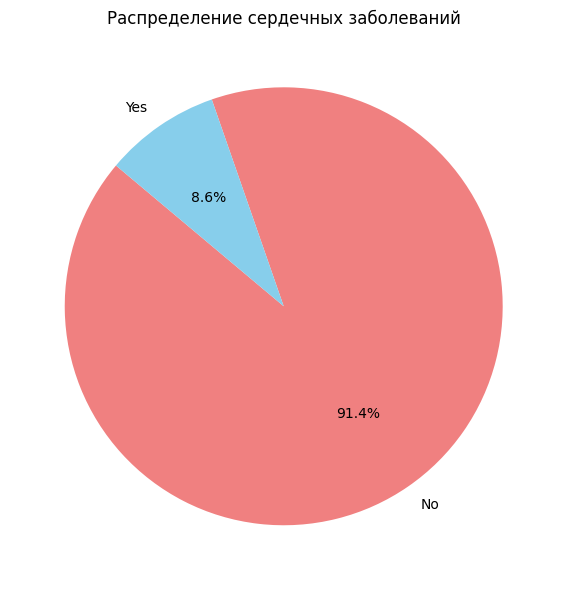

In [27]:
plt.figure(figsize=(6, 6))
heart_disease_counts = data['HeartDisease'].value_counts()
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=140)
plt.title('Распределение сердечных заболеваний')
plt.tight_layout()
plt.show()

## Диаграмма №2 (Столбчатая диаграмма)
Данная диаграмма показывает средние значения индекса массы тела (ИМТ) для людей с и без сердечного заболевания. Мы видим, что у людей с сердечным заболеванием средний ИМТ выше, что позволяет сделать вывод о том, что избыточный вес может способствовать риску возникновения сердечных приступов.

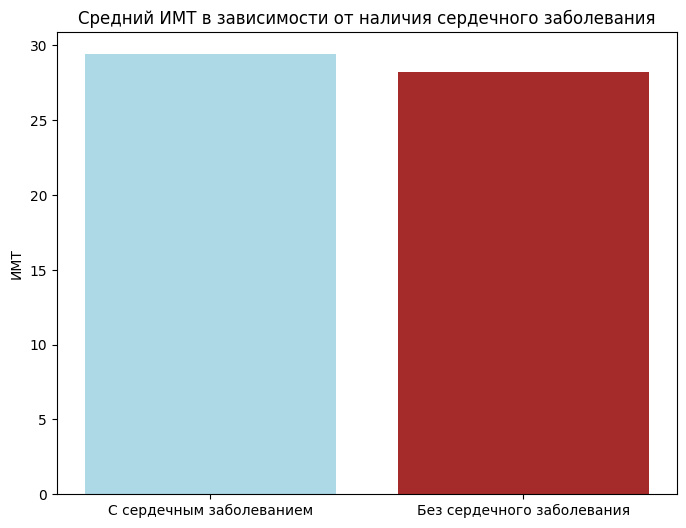

In [28]:
bmi_with_disease = data[data['HeartDisease'] == 'Yes']['BMI']
bmi_without_disease = data[data['HeartDisease'] == 'No']['BMI']

mean_bmi_with_disease = bmi_with_disease.mean()
mean_bmi_without_disease = bmi_without_disease.mean()

plt.figure(figsize=(8, 6))
plt.bar(['С сердечным заболеванием', 'Без сердечного заболевания'], 
        [mean_bmi_with_disease, mean_bmi_without_disease], 
        color=['lightblue', 'brown'])
plt.title('Средний ИМТ в зависимости от наличия сердечного заболевания')
plt.ylabel('ИМТ')
plt.show()

## Диаграмма №3 (Линейный график)
Данная диаграмма отображает процент курящих в зависимости от возраста и наличия сердечного заболевания, что позволяет сделать вывод о том, что у курящий людей выше риск развития сердечных заболеваний.

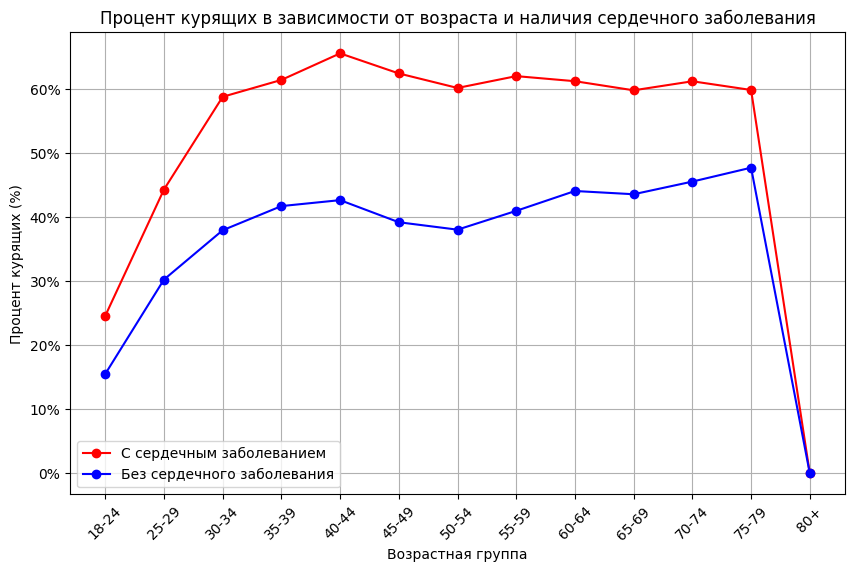

In [29]:
age_categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

data['AgeCategory'] = pd.Categorical(data['AgeCategory'], categories=age_categories, ordered=True)

smoking_by_age_with_disease = data[data['HeartDisease'] == 'Yes'].groupby('AgeCategory', observed=False)['Smoking'].value_counts(normalize=True).unstack()['Yes'] * 100
smoking_by_age_without_disease = data[data['HeartDisease'] == 'No'].groupby('AgeCategory', observed=False)['Smoking'].value_counts(normalize=True).unstack()['Yes'] * 100

plt.figure(figsize=(10, 6))
plt.plot(age_categories, smoking_by_age_with_disease, marker='o', label='С сердечным заболеванием', color='red')
plt.plot(age_categories, smoking_by_age_without_disease, marker='o', label='Без сердечного заболевания', color='blue')

plt.title('Процент курящих в зависимости от возраста и наличия сердечного заболевания')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент курящих (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.show()

